In [1]:
import numpy as np
import pandas as pd

In [ ]:
#survived, gender,fare,age,passenger class, sbisp, parch, embarked

In [4]:
df = pd.read_csv('data_cleaned.csv')

In [12]:
# checking for missing data
df.isnull().sum()

In [20]:
Y = df['Survived']
X = df.drop(['Survived'],axis=1)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=101,stratify=Y)

In [62]:
X_train.shape

(668, 24)

In [63]:
# distribution in test set.
# 61.435% values are zeros and 38.565% values are ones
Y_test.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
# creating decision tree model
model = DecisionTreeClassifier(random_state=10,criterion= 'entropy')
# here criterion indicates the techinique we are following to find best split. if criterion is entropy then we are conidering
#Information gain technique. for more info please refere documentation of decision trees.

In [66]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [67]:
# model accuarcy
model.score(X_train,Y_train)

0.9880239520958084

In [68]:
model.score(X_test,Y_test)

0.7174887892376681

In [58]:
Y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7174887892376681

# Improving Performance by changing Maxdepth 

In [106]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    decision_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    decision_model.fit(X_train,Y_train)
    train_accuracy.append(decision_model.score(X_train,Y_train))
    test_accuracy.append(decision_model.score(X_test,Y_test))

In [111]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})    

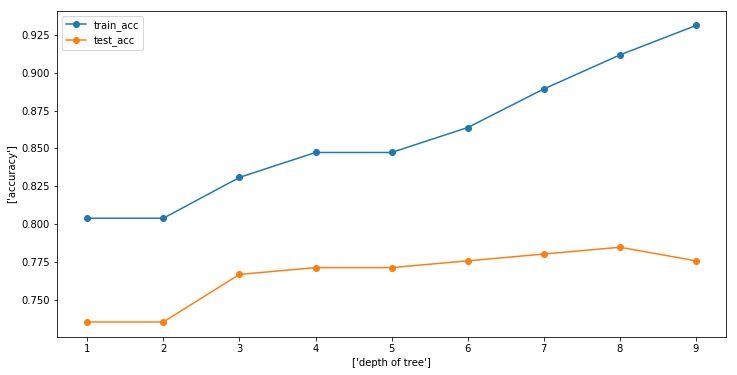

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o')
plt.plot(frame['max_depth'],frame['test_acc'],marker='o')
plt.xlabel(['depth of tree'])
plt.ylabel(['accuracy'])
plt.legend()

In [129]:
# from the  above observaton we are getting good performance when depth is 8.
depth_model = DecisionTreeClassifier(max_depth=8,max_leaf_nodes=25,random_state=10)
depth_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=25,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [130]:
print("Train score:",depth_model.score(X_train,Y_train))
print("Test Score:",depth_model.score(X_test,Y_test))

Train score: 0.8802395209580839
Test Score: 0.8161434977578476


In [131]:
Y_pred = depth_model.predict(X_test)
accuracy_score(Y_pred,Y_test)

0.8161434977578476